# CarTrade Second Hand Cars Web Scraping and EDA


#### Importing Required Libraries

In [1]:
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### URL:

In [2]:
base_url="https://www.cartrade.com/buy-used-cars/hyderabad/c#city=105&sc=-1&so=-1&pn={}"

#### Data Extraction:

In [3]:
all_carname=[]
all_year=[]
all_kms=[]
all_fuel=[]
all_city=[]
all_price=[]

for url in range(1,30):
    
    res = requests.get(base_url.format(url))
    soup = BeautifulSoup(res.text,"lxml")
    carname=soup.find_all('h2','h2heading truncate')
    
    for i in carname:
        li1=i.text.split()[1:3]
        all_carname.append(li1)
        year=[]
        li2=i.text.split()[0]
        all_year.append(li2)
        
    kms=soup.find_all('div','info_cr_new')
    for i in kms:
        all_kms.append(re.findall("(\d+,\d+)\sKMs",i.text))
        all_fuel.append(re.findall("\d+\sKMs[|](.*?)[|]\w+\n",i.text))
        all_city.append(re.findall('(\w+)\n',i.text))
    
    price=soup.find_all('div','cr_prc')
    for i in price:
        all_price.append(re.findall("([0-9]+(,[0-9]+)*,?)",i.text))    
    all_price.remove([])
        

In [4]:
len(all_carname), len(all_year), len(all_kms), len(all_fuel), len(all_city), len(all_price)

(910, 910, 910, 910, 910, 910)

#### Creating Data Frame:

In [5]:
cars_df=pd.DataFrame({'Car Name':all_carname, 'Price': all_price, 'Year Model': all_year,
                      'KMS': all_kms, 'Fuel Type':all_fuel, 'City':all_city })

In [6]:
cars_df

,Car Name,Price,Year Model,KMS,Fuel Type,City
0,"[Maruti, Suzuki]","[(6,10,000, ,000)]",2017,"[61,439]",[Petrol],[Hyderabad]
1,"[Maruti, Suzuki]","[(4,75,000, ,000)]",2017,"[49,608]",[Petrol],[Hyderabad]
2,"[Audi, Q3]","[(21,50,000, ,000)]",2014,"[50,270]",[Diesel],[Hyderabad]
3,"[Honda, Amaze]","[(4,65,000, ,000)]",2015,"[40,000]",[Petrol],[Hyderabad]
4,"[Mahindra, TUV300]","[(5,90,000, ,000)]",2016,"[47,500]",[Diesel],[Hyderabad]
...,...,...,...,...,...,...
905,"[Maruti, Suzuki]","[(5,98,000, ,000)]",2013,"[87,854]",[Diesel],[Hyderabad]
906,"[Hyundai, Elite]","[(7,00,000, ,000)]",2015,"[76,747]",[Petrol],[Hyderabad]
907,"[Honda, Jazz]","[(6,30,000, ,000)]",2017,"[27,430]",[Petrol],[Hyderabad]
908,"[Hyundai, Grand]","[(5,75,000, ,000)]",2015,"[53,470]",[Petrol],[Hyderabad]


#### Converting to CSV File:

In [7]:
cars_df.to_csv("Second_Hand_Cars_Analysis.csv")

#### Reading the CSV File:

In [8]:
cars_df = pd.read_csv("Second_Hand_Cars_Analysis.csv")

In [9]:
cars_df.columns

Index(['Unnamed: 0', 'Car Name', 'Price', 'Year Model', 'KMS', 'Fuel Type',
       'City'],
      dtype='object')

In [10]:
cars_df = cars_df.drop('Unnamed: 0',axis = 1)
cars_df.head(2)

,Car Name,Price,Year Model,KMS,Fuel Type,City
0,"['Maruti', 'Suzuki']","[('6,10,000', ',000')]",2017,"['61,439']",['Petrol'],['Hyderabad']
1,"['Maruti', 'Suzuki']","[('4,75,000', ',000')]",2017,"['49,608']",['Petrol'],['Hyderabad']


# EDA:

.

## Data Cleaning:

 #### Making values out from [] in the KMS, Fuel Type and City columns.

In [11]:
cars_df['KMS'] = cars_df['KMS'].apply(lambda x: x.replace('[','').replace("'",'').replace(']','').replace(",",""))
cars_df['Fuel Type'] = cars_df['Fuel Type'].apply(lambda x: x.replace('[','').replace("'",'').replace(']',''))
cars_df['City'] = cars_df['City'].apply(lambda x: x.replace('[','').replace("'",'').replace(']',''))

In [12]:
cars_df.head()

,Car Name,Price,Year Model,KMS,Fuel Type,City
0,"['Maruti', 'Suzuki']","[('6,10,000', ',000')]",2017,61439,Petrol,Hyderabad
1,"['Maruti', 'Suzuki']","[('4,75,000', ',000')]",2017,49608,Petrol,Hyderabad
2,"['Audi', 'Q3']","[('21,50,000', ',000')]",2014,50270,Diesel,Hyderabad
3,"['Honda', 'Amaze']","[('4,65,000', ',000')]",2015,40000,Petrol,Hyderabad
4,"['Mahindra', 'TUV300']","[('5,90,000', ',000')]",2016,47500,Diesel,Hyderabad


####  Making values out from [ ] in Car Name Column and Price Column and applying required lambda expressions in order to get the desired output.

In [13]:
cars_df['Car Name'] = cars_df['Car Name'].apply(lambda x: x.replace('[','').replace("'",'').replace(']','').replace(",",""))

In [14]:
cars_df['Price'] = cars_df['Price'].apply(lambda x: x.replace("[(",'').replace(",",'').replace("'",' ').replace(")]",''))

In [15]:
cars_df['Price'] = cars_df['Price'].apply(lambda x: x.split()[0])

In [16]:
cars_df.head()

,Car Name,Price,Year Model,KMS,Fuel Type,City
0,Maruti Suzuki,610000,2017,61439,Petrol,Hyderabad
1,Maruti Suzuki,475000,2017,49608,Petrol,Hyderabad
2,Audi Q3,2150000,2014,50270,Diesel,Hyderabad
3,Honda Amaze,465000,2015,40000,Petrol,Hyderabad
4,Mahindra TUV300,590000,2016,47500,Diesel,Hyderabad


# Data Processing for EDA:

In [17]:
cars_df.columns = map(str.lower, cars_df.columns)
cars_df.columns

Index(['car name', 'price', 'year model', 'kms', 'fuel type', 'city'], dtype='object')

In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   car name    910 non-null    object
 1   price       910 non-null    object
 2   year model  910 non-null    int64 
 3   kms         910 non-null    object
 4   fuel type   910 non-null    object
 5   city        910 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.8+ KB


#### Converting the required columns into required dtypes:

In [19]:
cars_df['price'] = cars_df['price'].astype(int)
cars_df['kms'] = cars_df['kms'].astype(int)

In [20]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   car name    910 non-null    object
 1   price       910 non-null    int32 
 2   year model  910 non-null    int64 
 3   kms         910 non-null    int32 
 4   fuel type   910 non-null    object
 5   city        910 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 35.7+ KB


In [21]:
cars_df.describe()

,price,year model,kms
count,9.100000e+02,910.000000,910.000000
mean,8.799926e+05,2014.838462,59756.142857
std,1.374722e+06,2.848823,20373.142793
min,8.625000e+04,2005.000000,0.000000
25%,4.750000e+05,2013.000000,46640.000000
50%,5.980000e+05,2016.000000,61439.000000
75%,7.705000e+05,2017.000000,74152.000000
max,1.690000e+07,2020.000000,97793.000000


In [22]:
cars_df.shape

(910, 6)

In [23]:
cars_df.head()

,car name,price,year model,kms,fuel type,city
0,Maruti Suzuki,610000,2017,61439,Petrol,Hyderabad
1,Maruti Suzuki,475000,2017,49608,Petrol,Hyderabad
2,Audi Q3,2150000,2014,50270,Diesel,Hyderabad
3,Honda Amaze,465000,2015,40000,Petrol,Hyderabad
4,Mahindra TUV300,590000,2016,47500,Diesel,Hyderabad


# Performing Analysis:

#### Company that has highest Price:

In [24]:
cars_df.sort_values(by = 'price',ascending=False).iloc[0,0]

'Lexus LS'

C:\Users\arshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


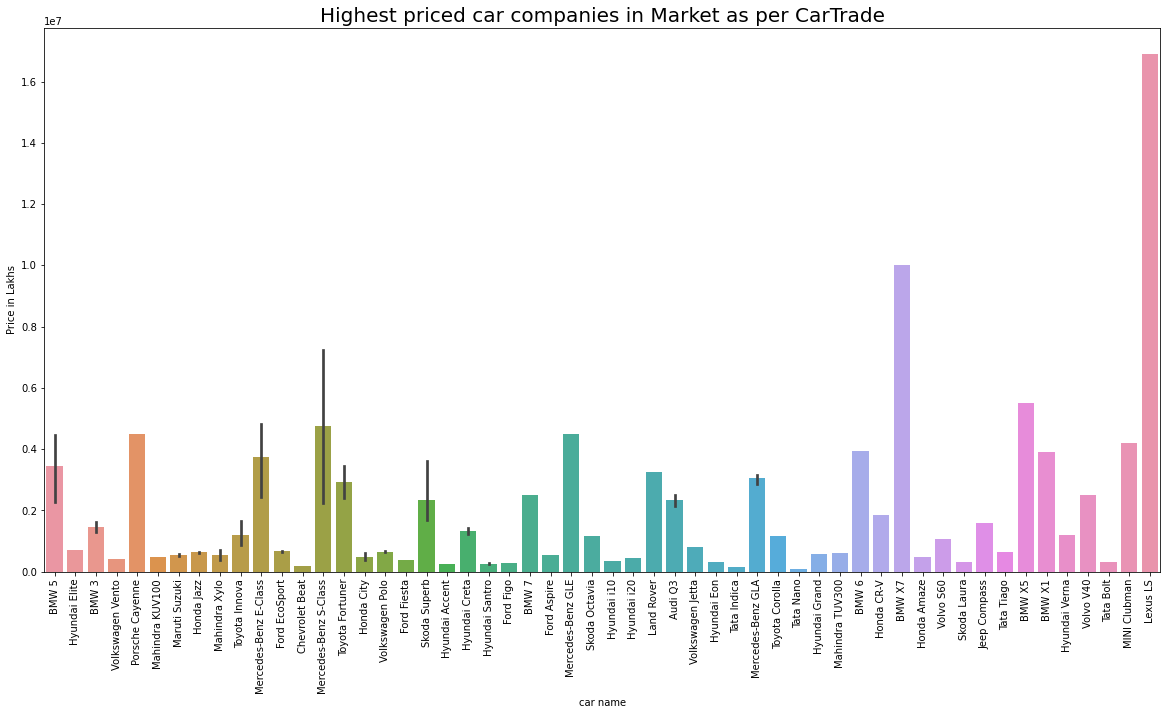

In [41]:
x = cars_df['car name'].head(910)
y = cars_df['price']
sns.barplot(x,y)
plt.rcParams['figure.figsize'] = (20,10)
plt.xticks(rotation = 90)
plt.ylabel('Price in Lakhs',fontsize=10)
plt.title('Highest priced car companies in Market as per CarTrade',fontsize=20)
plt.show()

#### Companies sorted by latest year models:

In [26]:
cars_df.sort_values(by = 'year model',ascending=False)

,car name,price,year model,kms,fuel type,city
790,Skoda Superb,3600000,2020,8130,Petrol,Hyderabad
349,Hyundai Verna,1195000,2020,12800,Petrol,Hyderabad
256,Toyota Fortuner,4100000,2020,24451,Diesel,Hyderabad
541,Lexus LS,16900000,2019,4000,Hybrid,Hyderabad
286,BMW X1,3900000,2019,14000,Diesel,Hyderabad
...,...,...,...,...,...,...
255,Mercedes-Benz S-Class,980000,2007,80000,Diesel,Hyderabad
817,Maruti Suzuki,165000,2006,85155,Petrol,Hyderabad
187,Maruti Suzuki,165000,2006,85155,Petrol,Hyderabad
786,Maruti Suzuki,165000,2006,85155,Petrol,Hyderabad


#### Total number of second hand cars of different models:

In [42]:
cars_df['car name'].value_counts().nlargest(910).values

array([292,  62,  58,  35,  31,  30,  30,  29,  29,  29,  29,  29,  29,
        29,  19,  12,  12,   9,   9,   8,   7,   7,   6,   5,   5,   5,
         4,   4,   4,   4,   4,   4,   3,   3,   3,   3,   3,   3,   3,
         2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1], dtype=int64)

In [28]:
x = cars_df['car name'].value_counts().nlargest(20).index
y = cars_df['car name'].value_counts().nlargest(20).values

C:\Users\arshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


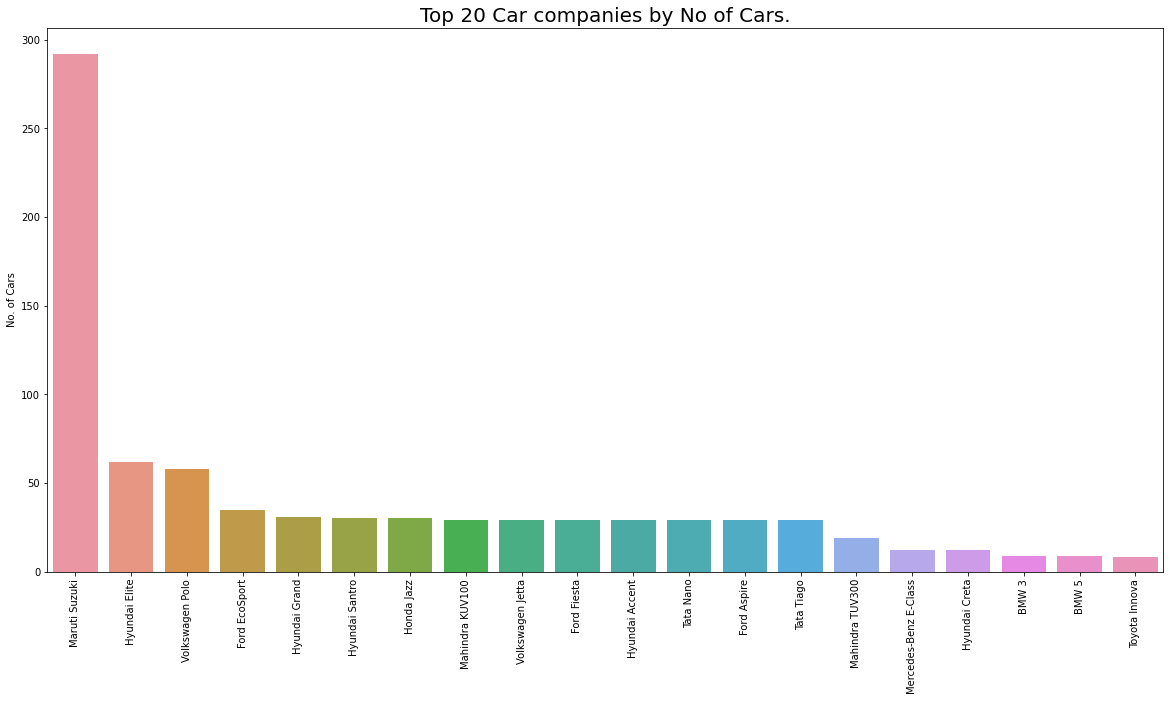

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
sns.barplot(x,y)
plt.xticks(rotation = 90)
plt.ylabel('No. of Cars')
plt.title('Top 20 Car companies by No of Cars.',fontsize=20)
plt.show()

#### Which car company has the highest number of second hand cars:

In [30]:
cars_df['car name'].value_counts().nlargest(10)

Maruti Suzuki       292
Hyundai Elite        62
Volkswagen Polo      58
Ford EcoSport        35
Hyundai Grand        31
Hyundai Santro       30
Honda Jazz           30
Mahindra KUV100      29
Volkswagen Jetta     29
Ford Fiesta          29
Name: car name, dtype: int64

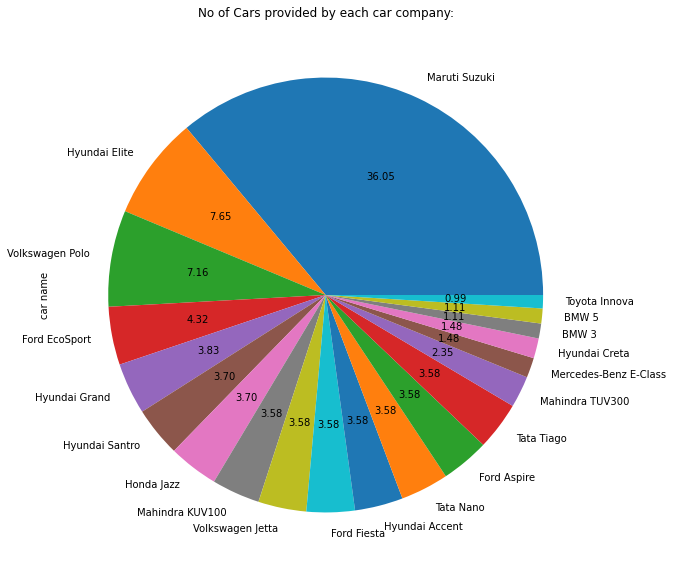

In [31]:
plt.figure(figsize=(10,10))
cars_df['car name'].value_counts().nlargest(20).plot.pie(autopct='%.2f')
plt.title('No of Cars provided by each car company:')
plt.show()

#### Sorting the dataframe by cars which have travelled more number of Kilometres:

In [32]:
cars_df.sort_values(by='kms',ascending=False,inplace=True)

C:\Users\arshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


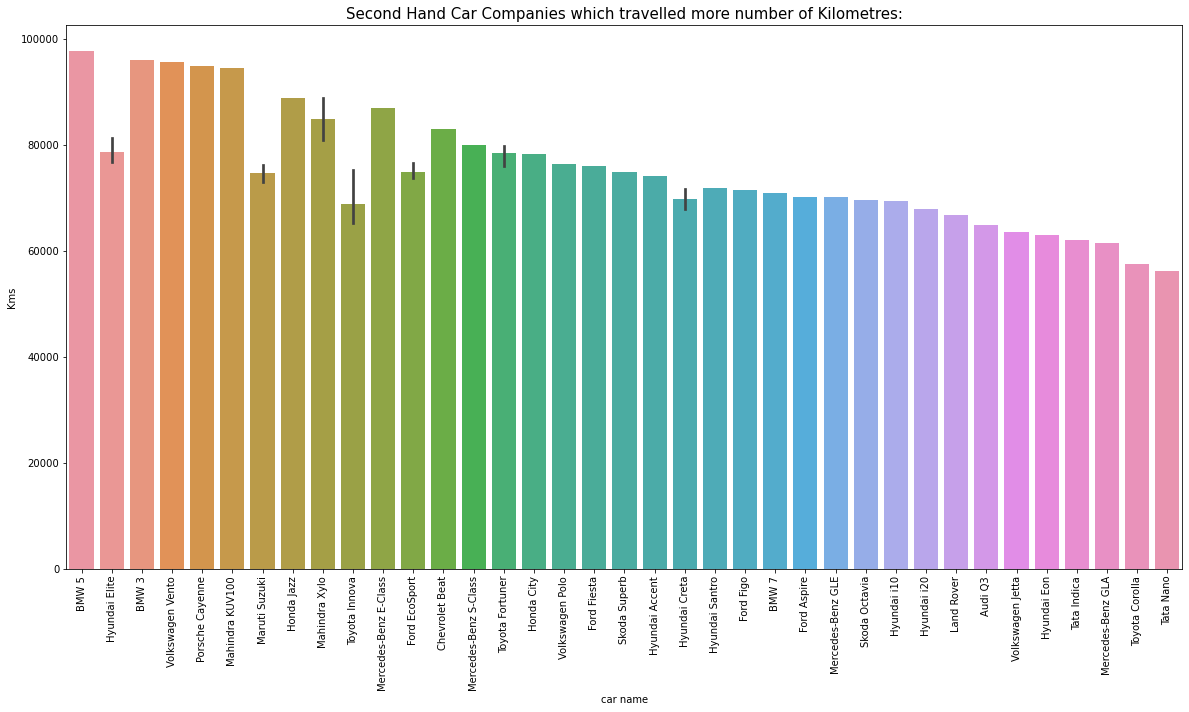

In [43]:
y = cars_df['kms'].nlargest(500).values
x = cars_df['car name'].head(500)
sns.barplot(x,y)
plt.rcParams['figure.figsize'] = (20,10)
plt.xticks(rotation = 90)
plt.ylabel('Kms')
plt.title('Second Hand Car Companies which travelled more number of Kilometres:',fontsize=15)
plt.show()

#### Average price demanded for the second hand cars in the market by the Car Companies:

In [34]:
mean = cars_df['price'].mean()
mean

879992.5824175824

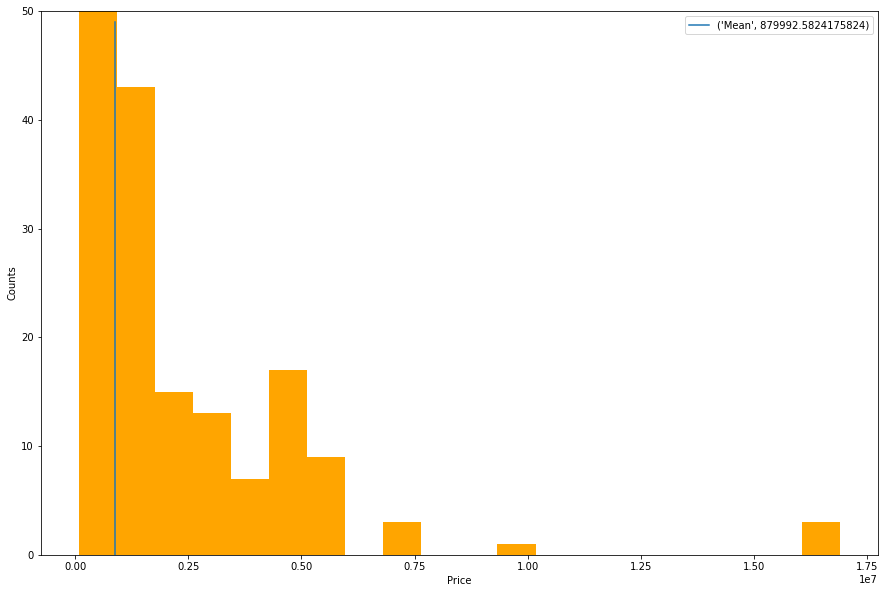

In [49]:
plt.figure(figsize=(15,10))
plt.hist(cars_df['price'], bins=20, color='orange')
plt.plot([mean]*50, range(50),label=("Mean",mean))
plt.ylim(0,50)
plt.xlabel('Price')
plt.ylabel('Counts')
plt.legend()
plt.show()

#### Car companies with higest number of fuel types available:

In [36]:
x = cars_df['fuel type'].value_counts().nlargest(20).index
y = cars_df['fuel type'].value_counts().nlargest(20).values

C:\Users\arshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


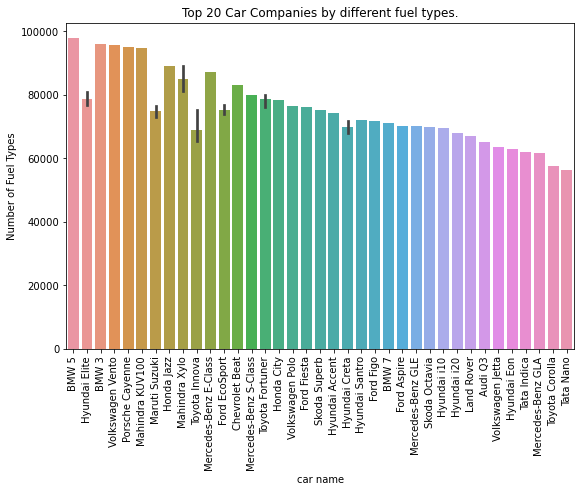

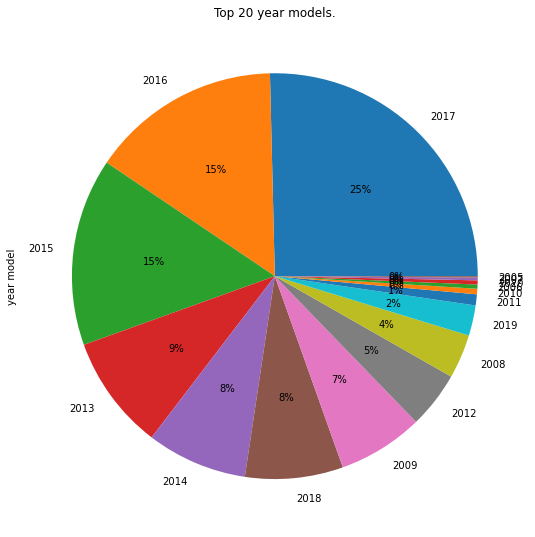

In [52]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.barplot(x,y)
plt.xticks(rotation = 90)
plt.ylabel('Number of Fuel Types')
plt.title('Top 20 Car Companies by different fuel types.')
plt.show()


plt.subplot(1,2,2)
cars_df['year model'].value_counts().nlargest(20).plot.pie(autopct = "%1.0f%%")
plt.title('Top 20 year models.')
plt.show()

#### Price VS Year Model:

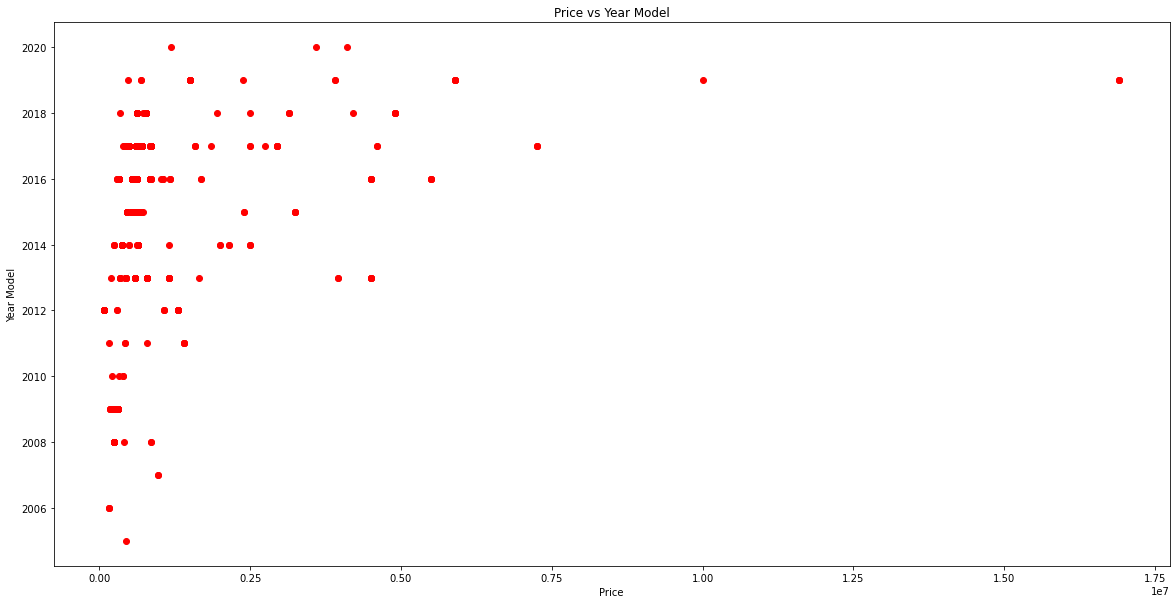

In [38]:
plt.scatter(cars_df['price'],cars_df['year model'],color='r')
plt.title('Price vs Year Model')
plt.ylabel('Year Model')
plt.xlabel('Price')
plt.show()

#### Heat Map for the Whole DF:

<AxesSubplot:>

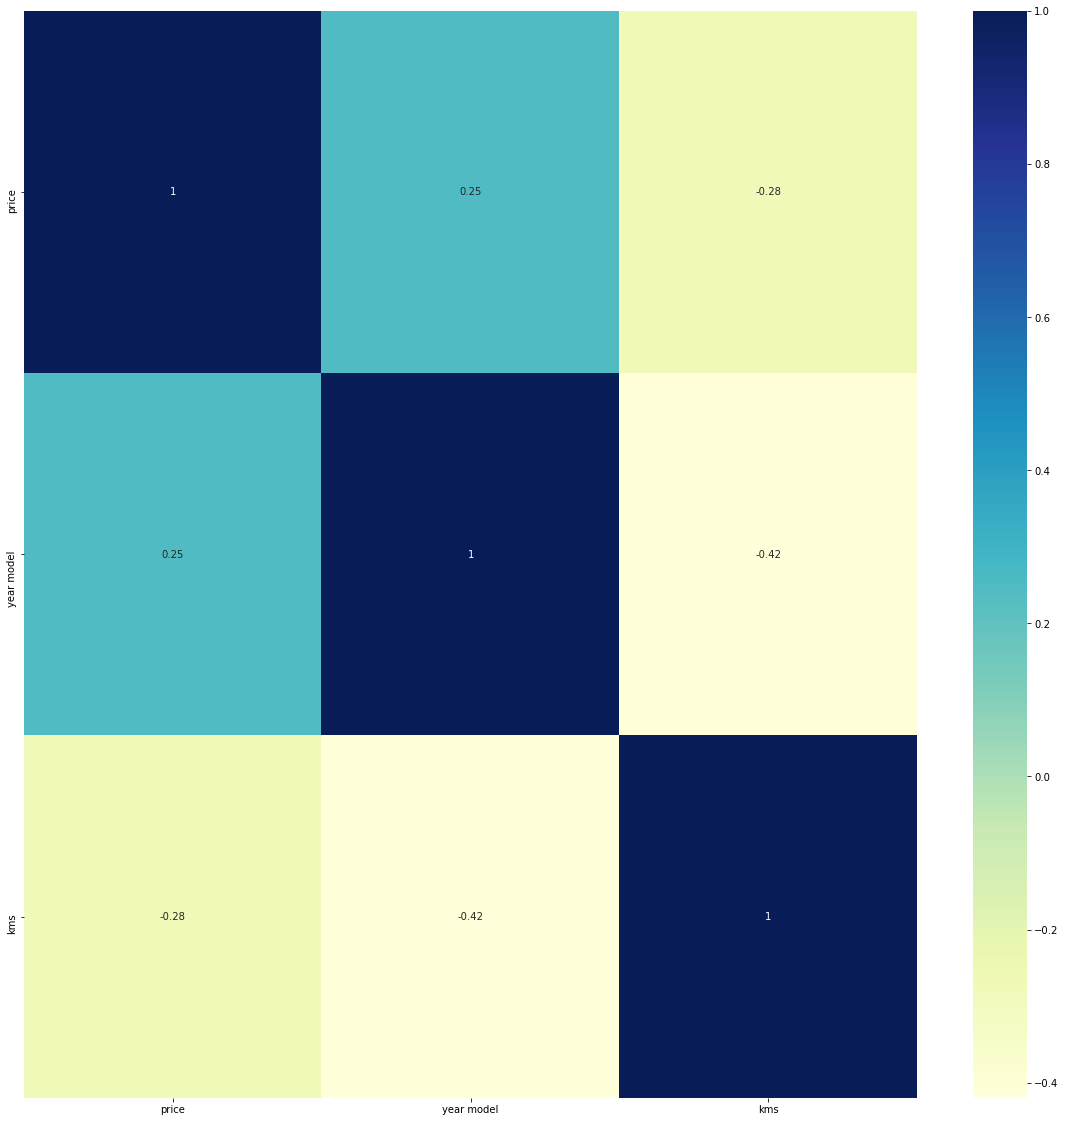

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cars_df.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Insights.

Insights: All the Insights are with reference or Analysis done on CarTrade website

1) Lexus LS is the highest priced car in the market and BMW X7 is the second highest priced car company.  

2) Top 20 car companies that sells more number of cars.  

     * Maruti Suzuki  
     * Volkswagen Polo  
     * Hyundai Elite  
     * Ford EcoSport  
     * Hyundai Grand  
     * Hyundai Santro  
     * Honda Jazz
     * Tata Nano
     * Mahindra KUV100
     * Volkswagen Jetta 
     * Hyundai Accent
     * Ford Fiesta  
     * Tata Tiago
     * Ford Aspire
     * Mahindra TUV300 
     * BMW 3
     * Toyota Fortuner 
     * Toyota Innova 
     * Hyundai Creta
     * Mercedes-Benz AMG  
     
3) Maruti Suzuki is the company that provides highest number of cars i.e., 35.73%  

4) Hyundai Verna, BMW 5, BMW 3, Volkswagen Vento and Mahindra KUV100 are the top 5 car companies which travelled more number of kilometres so far.  

5) Average price demanded for the second hand cars in the market by the Car Companies is 844254.38  

6) Number of car companies by Fuel Types:  
    
     * More than 500 car companies use Petrol as the fuel type.  
     * More than 300 car companies use Diesel as the fuel type.  
     
   So, Petrol as a fuel type is used by many car companies to major extent.  
   
7) 2017, is the year in which highest percentage of cars has been manufactures i.e., 25%.
           

 
 